In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
boroughs = [
    "Bronx",
    "Brooklyn",
    "EWR",
    "Manhattan",
    "Queens",
    "Staten Island",
]

In [27]:
data = {}

for borough in boroughs:
    data[borough] = pd.read_csv('results/' + borough + "/trip_time.csv", names=[f'{borough}', f'{borough}_std_dev'])[f'{borough}']


combined_df = pd.concat(
    [df for _, df in data.items()], axis=1
).sort_index()


In [28]:
combined_df.head()

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
0,882.807,886.744,2292.958333,912.257,1016.455,884.701
1,862.592,1066.627,2131.942308,818.246,1063.307,896.299
2,928.246,863.625,2120.342857,849.891,939.323,921.542
3,884.252,900.863,2154.076471,819.383,916.973,880.304
4,962.468,1087.842,2112.410256,893.488,1086.562,862.142


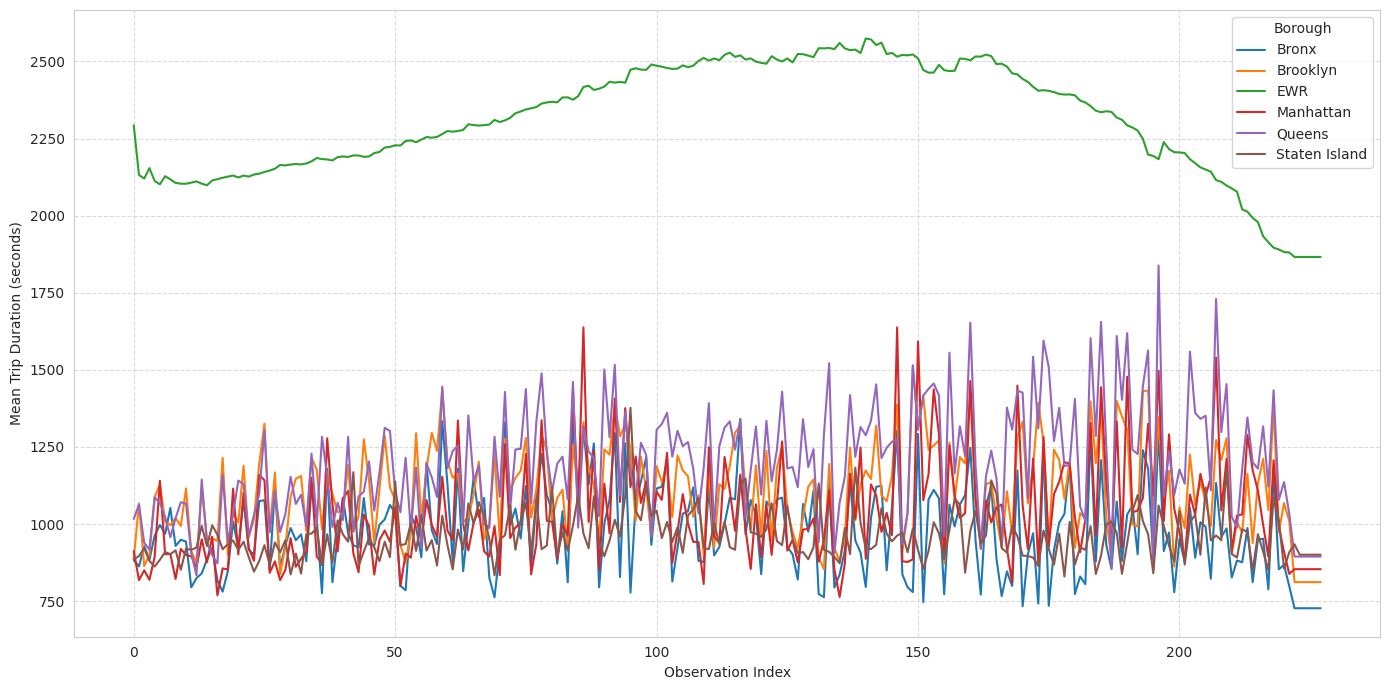

In [ ]:
df_mean_melted = combined_df.reset_index().melt(id_vars='index', var_name='Borough', value_name='Mean Trip Duration')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_mean_melted, x='index', y='Mean Trip Duration', hue='Borough')

plt.xlabel('Observation Index')
plt.ylabel('Mean Trip Duration (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('mean_trip_duration_boroughs_seaborn.svg')

In [36]:
combined_df.to_json()

'{"Bronx":{"0":882.807,"1":862.592,"2":928.246,"3":884.252,"4":962.468,"5":997.21,"6":968.105,"7":1052.16,"8":928.917,"9":949.006,"10":943.182,"11":794.734,"12":824.741,"13":839.656,"14":885.166,"15":923.159,"16":818.029,"17":780.802,"18":847.516,"19":1008.269,"20":922.656,"21":1078.922,"22":916.347,"23":900.861,"24":1074.356,"25":1077.276,"26":851.579,"27":1118.225,"28":856.867,"29":931.903,"30":987.029,"31":947.439,"32":966.492,"33":879.49,"34":1117.426,"35":1015.776,"36":775.515,"37":1179.257,"38":811.407,"39":957.717,"40":1084.935,"41":969.994,"42":931.185,"43":924.255,"44":1084.388,"45":934.275,"46":930.487,"47":997.924,"48":1014.95,"49":1061.961,"50":1035.792,"51":799.818,"52":785.336,"53":1029.594,"54":989.785,"55":892.598,"56":1199.022,"57":980.28,"58":935.232,"59":1333.608,"60":1129.128,"61":879.061,"62":1180.345,"63":847.214,"64":1006.374,"65":1148.785,"66":1022.821,"67":1084.553,"68":825.977,"69":762.434,"70":915.502,"71":1329.808,"72":997.021,"73":1050.215,"74":953.217,"75"

In [30]:


sns.set_style("whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.lineplot(
    data=combined_df, x=combined_df.index, hue="Service", marker="o"
)

plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Normalized Number of Rides", fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours are displayed on the x-axis
plt.legend(title="TLC Service", loc="upper left")  # Place legend outside
plt.grid(True, linestyle="--", alpha=0.7)  # Add a subtle grid

plt.tight_layout()
plt.savefig("data/figures/normalized_hourly_trip_lineplot.svg")
plt.show()

ValueError: Could not interpret value `Service` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>